In [25]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes
from msrest.authentication import CognitiveServicesCredentials

VISION_KEY = '65090791ce7d4c31abf67c72c979a20a'
VISION_URI = 'https://wintellect-vision.cognitiveservices.azure.com/'

client = ComputerVisionClient(
    credentials=CognitiveServicesCredentials(VISION_KEY),
    endpoint=VISION_URI
)

a man riding a sand dune (53.8%)


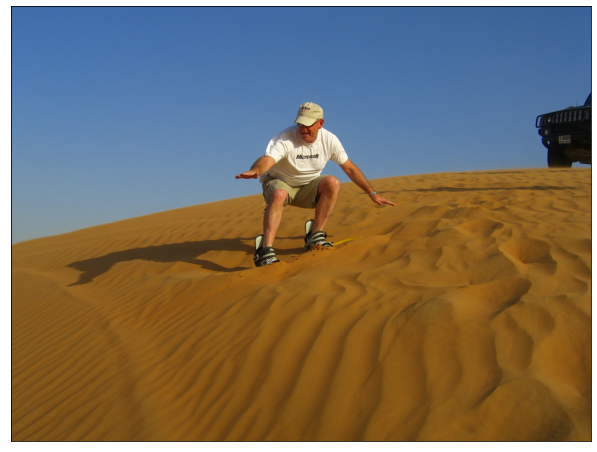

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

image = plt.imread('Data/dubai.jpg')
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)

with open('Data/dubai.jpg', mode='rb') as image:
    result = client.describe_image_in_stream(image)
    
    for caption in result.captions:
        print(f'{caption.text} ({caption.confidence:.1%})')

In [3]:
with open('Data/dubai.jpg', mode='rb') as image:
    result = client.describe_image_in_stream(image)
    
    for tag in result.tags:
        print(f'{tag}')

sky
outdoor
nature
dune


In [4]:
with open('Data/dubai.jpg', mode='rb') as image:
    result = client.analyze_image_in_stream(image, visual_features=[VisualFeatureTypes.tags])

    for tag in result.tags:
        print(f'{tag.name} ({tag.confidence:.1%})')

dune (99.5%)
sky (99.2%)
outdoor (98.7%)
clothing (98.2%)
desert (98.1%)
sand (97.9%)
aeolian landform (96.9%)
person (96.1%)
singing sand (95.8%)
erg (94.0%)
sahara (93.6%)
nature (93.4%)
footwear (90.9%)
landscape (88.0%)
sand dune (83.5%)
ground (77.5%)


In [5]:
with open('Data/dubai.jpg', mode='rb') as image:
    result = client.tag_image_in_stream(image)

    for tag in result.tags:
        print(f'{tag.name} ({tag.confidence:.1%})')

dune (99.5%)
sky (99.2%)
outdoor (98.7%)
clothing (98.2%)
desert (98.1%)
sand (97.9%)
aeolian landform (96.9%)
person (96.1%)
singing sand (95.8%)
erg (94.0%)
sahara (93.6%)
nature (93.4%)
footwear (90.9%)
landscape (88.0%)
sand dune (83.5%)
ground (77.5%)


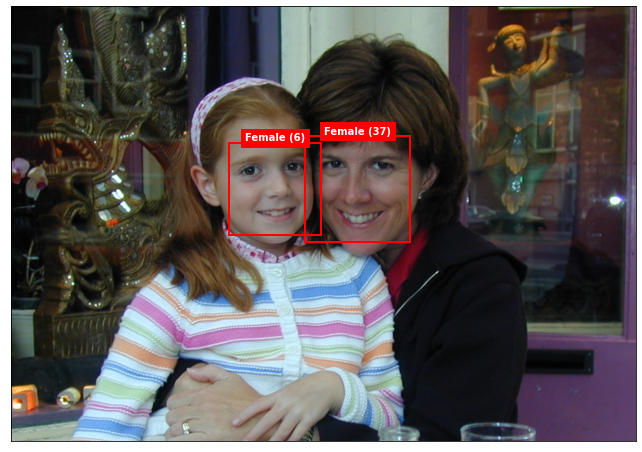

In [6]:
from matplotlib.patches import Rectangle

def annotate_face(face):
    x, y = face.face_rectangle.left, face.face_rectangle.top
    w, h = face.face_rectangle.width, face.face_rectangle.height
    rect = Rectangle((x, y), w, h, color='red', fill=False, lw=2)
    ax.add_patch(rect)
    text = f'{face.gender} ({face.age})'
    ax.text(x + (w / 2), y, text, color='white', backgroundcolor='red', ha='center', va='bottom', fontweight='bold', bbox=dict(color='red'))

image = plt.imread('Data/amsterdam.jpg')
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)

with open('Data/amsterdam.jpg', mode='rb') as image:
    result = client.analyze_image_in_stream(image, visual_features=[VisualFeatureTypes.faces])

    for face in result.faces:
        annotate_face(face)

Adultness: 0.02214685082435608
Raciness: 0.4205135107040405
Goriness: 0.001663445495069027
Is adult: False
Is racy: False
Is gory: False


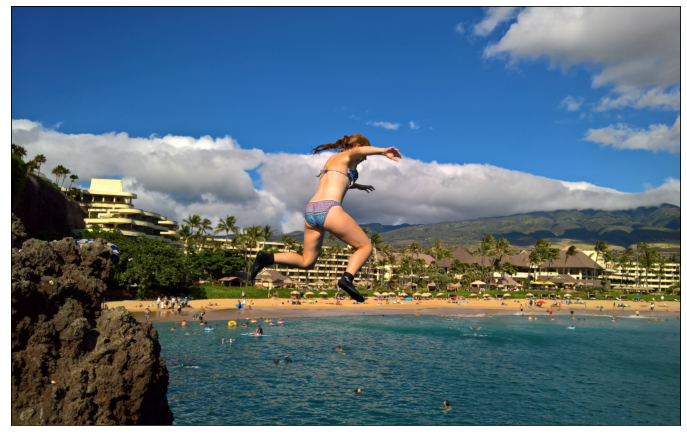

In [7]:
image = plt.imread('Data/maui.jpg')
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)

with open('Data/maui.jpg', mode='rb') as image:
    result = client.analyze_image_in_stream(image, visual_features=[VisualFeatureTypes.adult])

    print(f'Adultness: {result.adult.adult_score}')
    print(f'Raciness: {result.adult.racy_score}')
    print(f'Goriness: {result.adult.gore_score}')
    
    print(f'Is adult: {result.adult.is_adult_content}')
    print(f'Is racy: {result.adult.is_racy_content}')
    print(f'Is gory: {result.adult.is_gory_content}')

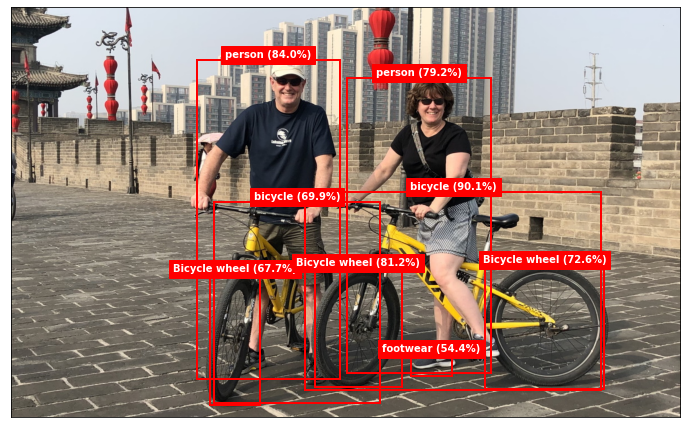

In [8]:
from matplotlib.patches import Rectangle

def annotate_object(name, confidence, bbox, min_confidence=0.5):
    if (confidence > min_confidence):
        x, y, w, h = bbox.x, bbox.y, bbox.w, bbox.h
        rect = Rectangle((x, y), w, h, color='red', fill=False, lw=2)
        ax.add_patch(rect)
        text = f'{name} ({confidence:.1%})'
        ax.text(x + (w / 2), y, text, color='white', backgroundcolor='red', ha='center', va='bottom', fontweight='bold', bbox=dict(color='red'))

image = plt.imread('Data/xian.jpg')
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)
        
with open('Data/xian.jpg', mode='rb') as image:
    result = client.detect_objects_in_stream(image)
    
    for object in result.objects:
        annotate_object(object.object_property, object.confidence, object.rectangle)

DIAMOND HEAD
STATE MONUMENT
DEPARTMENT
OF
T LAND & NATURAL RESOURCES


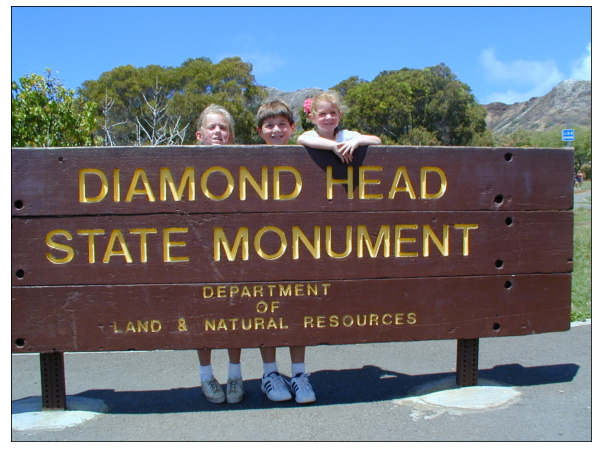

In [9]:
import time
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes

image = plt.imread('Data/diamondhead.jpg')
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)

with open('Data/diamondhead.jpg', mode='rb') as image:
    response = client.read_in_stream(image, raw=True)
    
    location = response.headers["Operation-Location"]
    opid = location[len(location) - 36:]
    result = client.get_read_result(opid)
    
    while result.status == OperationStatusCodes.running:
        result = client.get_read_result(opid)
        time.sleep(1)
        
    if result.status == OperationStatusCodes.succeeded:
        for line in result.analyze_result.read_results[0].lines:
            print(line.text)

DIAMOND HEAD
STATE MONUMENT
DEPARTMENT
OF
T LAND & NATURAL RESOURCES


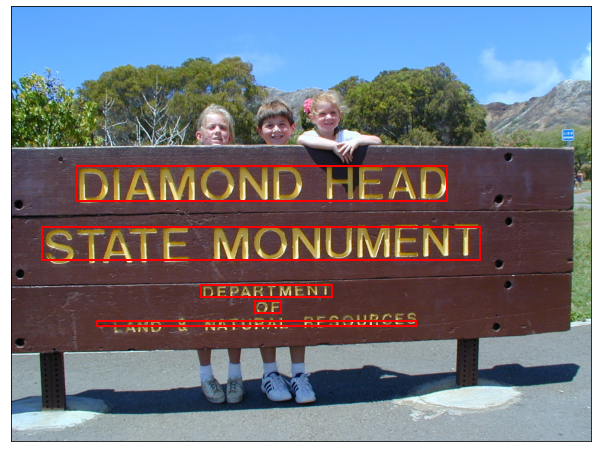

In [22]:
import time
from azure.cognitiveservices.vision.computervision.models import OperationStatusCodes

def draw_box(bbox):
    x, y  = bbox[0], bbox[1]
    w = bbox[4] - x
    h = bbox[5] - y
    rect = Rectangle((x, y), w, h, color='red', fill=False, lw=2)
    ax.add_patch(rect)

image = plt.imread('Data/diamondhead.jpg')
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'xticks': [], 'yticks': []})
ax.imshow(image)

with open('Data/diamondhead.jpg', mode='rb') as image:
    response = client.read_in_stream(image, raw=True)
    
    location = response.headers["Operation-Location"]
    opid = location[len(location) - 36:]
    result = client.get_read_result(opid)
    
    while result.status == OperationStatusCodes.running:
        result = client.get_read_result(opid)
        time.sleep(1)
        
    if result.status == OperationStatusCodes.succeeded:
        for line in result.analyze_result.read_results[0].lines:
            draw_box(line.bounding_box)
            print(line.text)

In [26]:
from azure.cognitiveservices.vision.computervision.models import ComputerVisionErrorResponseException

try:
    with open('Data/weeping_valley.jpg', mode='rb') as image:
        result = client.describe_image_in_stream(image)

        for caption in result.captions:
            print(f'{caption.text} ({caption.confidence:.1%})')

except ComputerVisionErrorResponseException as e:
    print(e.message)
    
except Exception as e:
    print(e)

(InvalidRequest) Input image is too large.
